# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 626


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = base_url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | tidore
City not found. Skipping...
Processing Record 3 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 5 of Set 1 | tiksi
Processing Record 6 of Set 1 | georgetown
Processing Record 7 of Set 1 | hilo
Processing Record 8 of Set 1 | kavieng
Processing Record 9 of Set 1 | wilmington
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | strezhevoy
Processing Record 12 of Set 1 | saldanha
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | kamenskoye
City not found. Skipping...
Processing Record 15 of Set 1 | bakal
Processing Record 16 of Set 1 | barrow
Processing Record 17 of Set 1 | cochrane
Processing Record 18 of Set 1 | talcahuano
Processing Record 19 of Set 1 | lensk
Processing Record 20 of Set 1 | murgab
Processing 

Processing Record 38 of Set 4 | constitucion
Processing Record 39 of Set 4 | solaro
Processing Record 40 of Set 4 | pinawa
Processing Record 41 of Set 4 | gopichettipalaiyam
City not found. Skipping...
Processing Record 42 of Set 4 | bargal
City not found. Skipping...
Processing Record 43 of Set 4 | ahipara
Processing Record 44 of Set 4 | port elizabeth
Processing Record 45 of Set 4 | burnie
Processing Record 46 of Set 4 | barahona
Processing Record 47 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 48 of Set 4 | ajaccio
Processing Record 49 of Set 4 | dumas
Processing Record 0 of Set 5 | cidreira
Processing Record 1 of Set 5 | kupang
Processing Record 2 of Set 5 | olafsvik
Processing Record 3 of Set 5 | kodiak
Processing Record 4 of Set 5 | pithoragarh
Processing Record 5 of Set 5 | port alfred
Processing Record 6 of Set 5 | svetlogorsk
Processing Record 7 of Set 5 | hithadhoo
Processing Record 8 of Set 5 | port alberni
Processing Record 9 of Set 5 | port hueneme


Processing Record 23 of Set 8 | viligili
City not found. Skipping...
Processing Record 24 of Set 8 | salinas
Processing Record 25 of Set 8 | monrovia
Processing Record 26 of Set 8 | khasan
Processing Record 27 of Set 8 | moindou
Processing Record 28 of Set 8 | castro
Processing Record 29 of Set 8 | hami
Processing Record 30 of Set 8 | thabazimbi
Processing Record 31 of Set 8 | zyryanskoye
Processing Record 32 of Set 8 | iqaluit
Processing Record 33 of Set 8 | manado
Processing Record 34 of Set 8 | nikel
Processing Record 35 of Set 8 | beatrice
Processing Record 36 of Set 8 | yazykovo
Processing Record 37 of Set 8 | tuggurt
City not found. Skipping...
Processing Record 38 of Set 8 | bondowoso
Processing Record 39 of Set 8 | werda
Processing Record 40 of Set 8 | labuhan
Processing Record 41 of Set 8 | darab
Processing Record 42 of Set 8 | salalah
Processing Record 43 of Set 8 | urengoy
Processing Record 44 of Set 8 | isiro
Processing Record 45 of Set 8 | lermontovka
Processing Record 46 

Processing Record 11 of Set 12 | beaupre
Processing Record 12 of Set 12 | el dorado
Processing Record 13 of Set 12 | antalaha
Processing Record 14 of Set 12 | krasnoselkup
Processing Record 15 of Set 12 | svetlyy
Processing Record 16 of Set 12 | safaga
Processing Record 17 of Set 12 | kashi
Processing Record 18 of Set 12 | mirnyy
Processing Record 19 of Set 12 | aklavik
Processing Record 20 of Set 12 | mangan
Processing Record 21 of Set 12 | bandarbeyla
Processing Record 22 of Set 12 | zakamensk
Processing Record 23 of Set 12 | chicama
Processing Record 24 of Set 12 | ossora
Processing Record 25 of Set 12 | bukama
Processing Record 26 of Set 12 | saint-georges
Processing Record 27 of Set 12 | challans
Processing Record 28 of Set 12 | pakaur
Processing Record 29 of Set 12 | plettenberg bay
Processing Record 30 of Set 12 | courtalam
City not found. Skipping...
Processing Record 31 of Set 12 | clinton
Processing Record 32 of Set 12 | saint-pierre
Processing Record 33 of Set 12 | umba
Proc

In [4]:
city_weather

{'coord': {'lon': -16.3333, 'lat': 33.0833},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 56.62,
  'feels_like': 54.95,
  'temp_min': 56.62,
  'temp_max': 56.62,
  'pressure': 1025,
  'humidity': 63},
 'visibility': 10000,
 'wind': {'speed': 13.8, 'deg': 60},
 'clouds': {'all': 40},
 'dt': 1675117784,
 'sys': {'type': 1,
  'id': 6902,
  'country': 'PT',
  'sunrise': 1675065739,
  'sunset': 1675103679},
 'timezone': 0,
 'id': 2270385,
 'name': 'Camacha',
 'cod': 200}

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_records(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,33.64,85,98,1.57,US,1675117079
1,tiksi,71.6872,128.8694,-21.64,98,100,5.95,RU,1675117447
2,georgetown,5.4112,100.3354,80.53,75,20,4.61,MY,1675117377
3,hilo,19.7297,-155.0900,71.02,93,100,6.91,US,1675117417
4,kavieng,-2.5744,150.7967,82.15,75,100,5.53,PG,1675117453


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,33.64,85,98,1.57,US,1675117079
1,tiksi,71.6872,128.8694,-21.64,98,100,5.95,RU,1675117447
2,georgetown,5.4112,100.3354,80.53,75,20,4.61,MY,1675117377
3,hilo,19.7297,-155.0900,71.02,93,100,6.91,US,1675117417
4,kavieng,-2.5744,150.7967,82.15,75,100,5.53,PG,1675117453


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

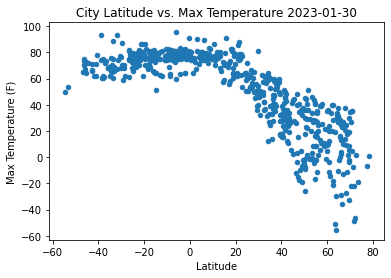

In [10]:
# Build scatter plot for latitude vs. temperature
from datetime import date

city_data_df.plot.scatter(x="Lat", y="Max Temp")

today = date.today()

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature {today}")
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

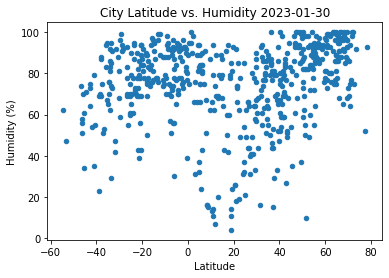

In [11]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x="Lat", y="Humidity")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity {today}")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

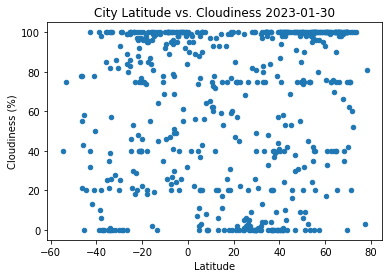

In [12]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(x="Lat", y="Cloudiness")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness {today}")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

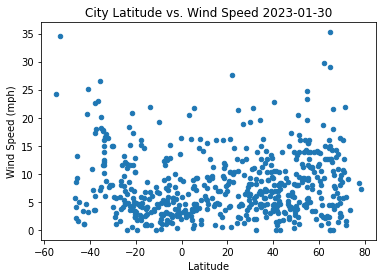

In [14]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(x="Lat", y="Wind Speed")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed {today}")
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
lin_x = city_data_df["Lat"]
lin_y = city_data_df["Wind Speed"]
m, b = np.polyfit(lin_x, lin_y, 1)
#plt.plot(lin_x, m*lin_x+b)

In [16]:
slope, intercept, rvalue, pvalue, stderr = linregress(lin_x, lin_y)
#print(rvalue)

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,33.64,85,98,1.57,US,1675117079
1,tiksi,71.6872,128.8694,-21.64,98,100,5.95,RU,1675117447
2,georgetown,5.4112,100.3354,80.53,75,20,4.61,MY,1675117377
3,hilo,19.7297,-155.0900,71.02,93,100,6.91,US,1675117417
5,wilmington,34.2257,-77.9447,63.95,83,100,6.91,US,1675117177


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,kavieng,-2.5744,150.7967,82.15,75,100,5.53,PG,1675117453
6,punta arenas,-53.1500,-70.9167,53.71,47,75,34.52,CL,1675117316
8,saldanha,-33.0117,17.9442,65.89,73,0,8.66,ZA,1675117456
9,rikitea,-23.1203,-134.9692,79.18,72,18,8.59,PF,1675117458
13,talcahuano,-36.7167,-73.1167,73.08,53,0,23.02,CL,1675117464


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8291580089872373.


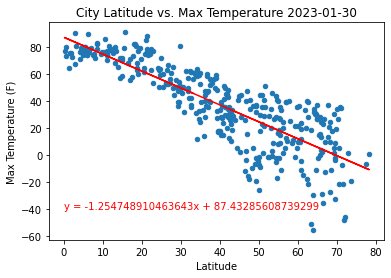

In [39]:
# Linear regression on Northern Hemisphere
northern_hemi_df.plot.scatter(x="Lat", y="Max Temp")

tempN_x = northern_hemi_df["Lat"]
tempN_y = northern_hemi_df["Max Temp"]
m, b = np.polyfit(tempN_x, tempN_y, 1)
plt.plot(tempN_x, m*tempN_x+b, color='red')

slope, intercept, rvalue, pvalue, stderr = linregress(tempN_x, tempN_y)


plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature {today}")
plt.text(x=0,
         y=-40,
         s=f"y = {slope}x + {intercept}",
        color='red')

print(f'The r-value is {rvalue}.')
plt.show()

The r-value is 0.40294629411053956.


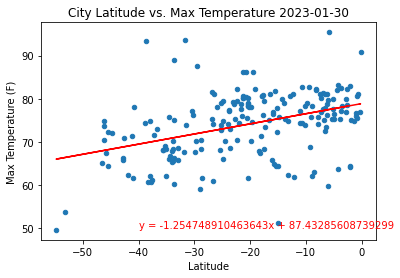

In [40]:
# Linear regression on Southern Hemisphere
southern_hemi_df.plot.scatter(x="Lat", y="Max Temp")

tempS_x = southern_hemi_df["Lat"]
tempS_y = southern_hemi_df["Max Temp"]
m, b = np.polyfit(tempS_x, tempS_y, 1)
plt.plot(tempS_x, m*tempS_x+b, color='red')
plt.text(x=-40,
         y=50,
         s=f"y = {slope}x + {intercept}",
        color='red')

slope, intercept, rvalue, pvalue, stderr = linregress(tempS_x, tempS_y)


plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature {today}")

print(f'The r-value is {rvalue}.')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.41253351150136885.


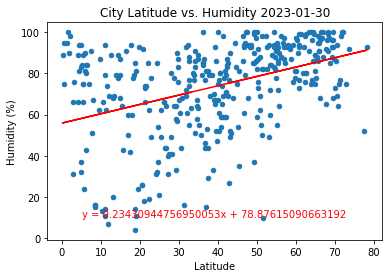

In [41]:
# Northern Hemisphere
northern_hemi_df.plot.scatter(x="Lat", y="Humidity")

humN_x = northern_hemi_df["Lat"]
humN_y = northern_hemi_df["Humidity"]
m, b = np.polyfit(humN_x, humN_y, 1)
plt.plot(humN_x, m*humN_x+b, color='red')
plt.text(x=5,
         y=10,
         s=f"y = {slope}x + {intercept}",
        color='red')

slope, intercept, rvalue, pvalue, stderr = linregress(humN_x, humN_y)


plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity {today}")

print(f'The r-value is {rvalue}.')
plt.show()

The r-value is 0.32629409453154745.


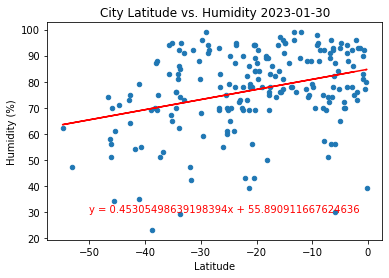

In [42]:
# Southern Hemisphere
southern_hemi_df.plot.scatter(x="Lat", y="Humidity")

humS_x = southern_hemi_df["Lat"]
humS_y = southern_hemi_df["Humidity"]
m, b = np.polyfit(humS_x, humS_y, 1)
plt.plot(humS_x, m*humS_x+b, color='red')
plt.text(x=-50,
         y=30,
         s=f"y = {slope}x + {intercept}",
        color='red')

slope, intercept, rvalue, pvalue, stderr = linregress(humS_x, humS_y)


plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity {today}")

print(f'The r-value is {rvalue}.')
plt.show()

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.28436134830406784.


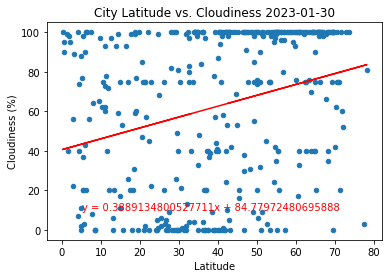

In [43]:
# Northern Hemisphere
northern_hemi_df.plot.scatter(x="Lat", y="Cloudiness")

cldN_x = northern_hemi_df["Lat"]
cldN_y = northern_hemi_df["Cloudiness"]
m, b = np.polyfit(cldN_x, cldN_y, 1)
plt.plot(cldN_x, m*cldN_x+b, color='red')
plt.text(x=5,
         y=10,
         s=f"y = {slope}x + {intercept}",
        color='red')

slope, intercept, rvalue, pvalue, stderr = linregress(cldN_x, cldN_y)


plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness {today}")

print(f'The r-value is {rvalue}.')
plt.show()

The r-value is 0.3575092611674774.


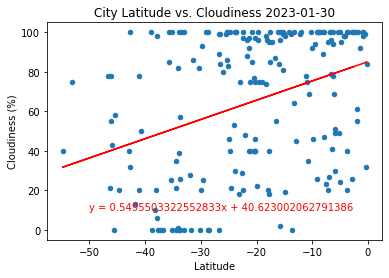

In [44]:
# Southern Hemisphere
southern_hemi_df.plot.scatter(x="Lat", y="Cloudiness")

cldS_x = southern_hemi_df["Lat"]
cldS_y = southern_hemi_df["Cloudiness"]
m, b = np.polyfit(cldS_x, cldS_y, 1)
plt.plot(cldS_x, m*cldS_x+b, color='red')
plt.text(x=-50,
         y=10,
         s=f"y = {slope}x + {intercept}",
        color='red')

slope, intercept, rvalue, pvalue, stderr = linregress(cldS_x, cldS_y)


plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness {today}")

print(f'The r-value is {rvalue}.')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.14368401382595256.


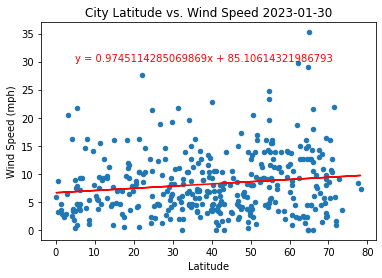

In [45]:
# Northern Hemisphere
northern_hemi_df.plot.scatter(x="Lat", y="Wind Speed")

windN_x = northern_hemi_df["Lat"]
windN_y = northern_hemi_df["Wind Speed"]
m, b = np.polyfit(windN_x, windN_y, 1)
plt.plot(windN_x, m*windN_x+b, color='red')
plt.text(x=5,
         y=30,
         s=f"y = {slope}x + {intercept}",
        color='red')

slope, intercept, rvalue, pvalue, stderr = linregress(windN_x, windN_y)


plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed {today}")

print(f'The r-value is {rvalue}.')
plt.show()

The r-value is -0.3659603819798604.


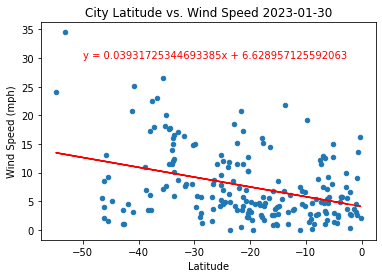

In [46]:
# Southern Hemisphere
southern_hemi_df.plot.scatter(x="Lat", y="Wind Speed")

windS_x = southern_hemi_df["Lat"]
windS_y = southern_hemi_df["Wind Speed"]
m, b = np.polyfit(windS_x, windS_y, 1)
plt.plot(windS_x, m*windS_x+b, color='red')
plt.text(x=-50,
         y=30,
         s=f"y = {slope}x + {intercept}",
        color='red')

slope, intercept, rvalue, pvalue, stderr = linregress(windS_x, windS_y)


plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed {today}")

print(f'The r-value is {rvalue}.')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# Looking at these plots, especially the hemispheric plots that include the linar regression lines, it looks clear that the
# only strong correlary relationship is between the city's latitude and the maximum temperature for that day. I was
# surprised to see the humidity plot. The tropics are generally considered to be more humid, but there did not seem to be a
# strong relationship between the latitude of the city and the humidity percentage. The southern hemisphere did have a
# stronger relationship than the northern hemishpere, but still not as much as I would have expected.